1. PANDAS (25 points)

In [51]:
# 1 (2 marks). Load the netflix_titles.csv dataset as a Pandas dataframe:
import pandas as pd

file_path = "/content/sample_data/netflix_titles.csv"

netflix_df = pd.read_csv(file_path)



In [52]:
# 2 (2 marks). Show the first 10 rows of the dataset

print(netflix_df.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [53]:
# 3 (1 mark). Show the last 5 rows
print(netflix_df.tail(5))

     show_id     type        title         director  \
8802   s8803    Movie       Zodiac    David Fincher   
8803   s8804  TV Show  Zombie Dumb              NaN   
8804   s8805    Movie   Zombieland  Ruben Fleischer   
8805   s8806    Movie         Zoom     Peter Hewitt   
8806   s8807    Movie       Zubaan      Mozez Singh   

                                                   cast        country  \
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

             date_added  release_year rating   duration  \
8802  November 20, 2019          2007      R    158 min   
8803       July 1, 2019          2018  TV-Y7  2 Seasons   
8804   November 1, 2019          2009      R   

In [54]:
# 4 (4 marks). Count the number of rows which have no missing value in any of the columns, and show the resulting data frame.

non_missing_rows_count = netflix_df.dropna().shape[0]

netflix_no_missing_values = netflix_df.dropna()

# Display the number of rows and the resulting dataframe
print(f"Number of rows with no missing values: {non_missing_rows_count}")



Number of rows with no missing values: 5332


In [55]:
# 5 (3 marks). Drop everything that is not a 'Movie' and show the resulting data frame.

movies_df = netflix_df[netflix_df['type'] == 'Movie']

# Display the resulting dataframe
print("Resulting dataframe with only 'Movie' content type:")
print(movies_df)

Resulting dataframe with only 'Movie' content type:
     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
7         s8  Movie                           Sankofa   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
...      ...    ...                               ...   
8801   s8802  Movie                           Zinzana   
8802   s8803  Movie                            Zodiac   
8804   s8805  Movie                        Zombieland   
8805   s8806  Movie                              Zoom   
8806   s8807  Movie                            Zubaan   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
7                      Haile Gerima   
9                    Theodore Melfi   
12              Christian Schwochow   
...                          

In [56]:
# 6 (7 marks). For every movie where the duration is missing, replace it with the average
  # duration of the movies in the dataset.

average_duration = netflix_df[netflix_df['type'] == 'Movie']['duration'].dropna().astype(str).str.extract('(\d+)').astype(float).mean()

netflix_df.loc[(netflix_df['type'] == 'Movie') & (netflix_df['duration'].isna()), 'duration'] = average_duration




In [57]:
# 7 (3 marks). Are there any duplicates in the data? If yes, please remove them.

duplicate_rows = netflix_df[netflix_df.duplicated()]

netflix_df = netflix_df.drop_duplicates()



In [58]:
# 8 (2 marks). Rename all columns to start with a capital letter.

netflix_df.columns = [col.capitalize() for col in netflix_df.columns]


In [59]:
# 9 (1 mark). Save the cleaned dataset as a new csv file.

netflix_df.to_csv('cleaned_netflix_dataset.csv', index=False)

print("Cleaned dataset has been saved as 'cleaned_netflix_dataset.csv'")


Cleaned dataset has been saved as 'cleaned_netflix_dataset.csv'


2. MATPLOTLIB (25 points)

Use the netflix dataset to solve the exercises in this section.

<ipython-input-60-e159e8df6096>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_year'] = movies_df['release_year'].astype(str).str.extract('(\d+)')


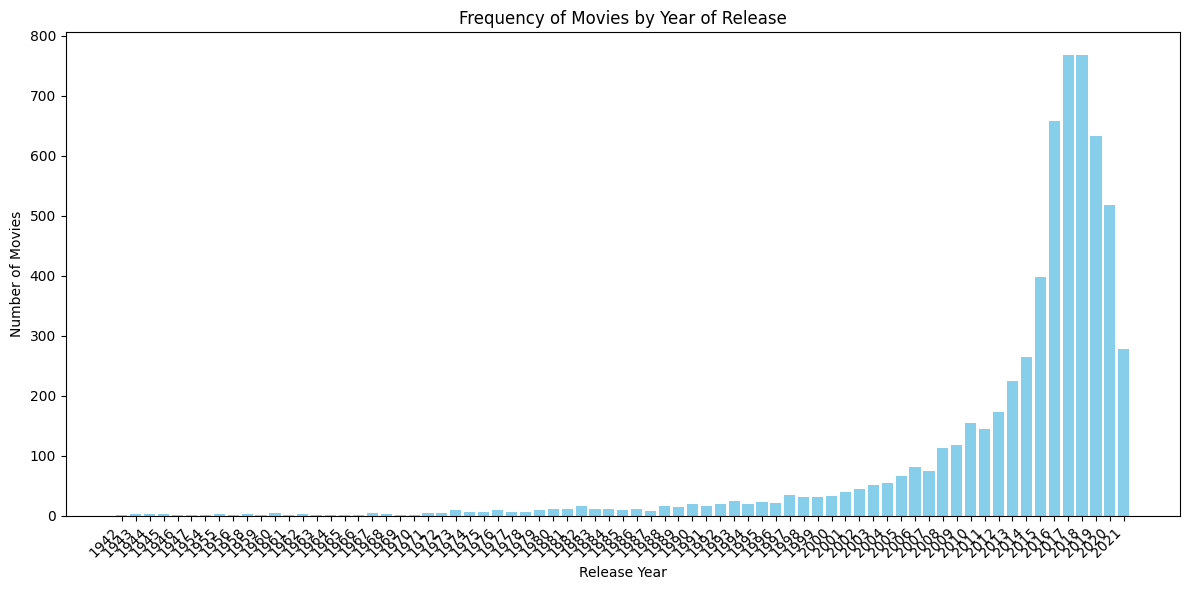

In [60]:
# 1 (10 marks). Create a visualisation which shows the frequency of movies by year of release.

import matplotlib.pyplot as plt
import pandas as pd

file_path = "/content/sample_data/netflix_titles.csv"

netflix_df = pd.read_csv(file_path)


movies_df = netflix_df[netflix_df['type'] == 'Movie']


movies_df['release_year'] = movies_df['release_year'].astype(str).str.extract('(\d+)')


movies_by_year = movies_df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(movies_by_year.index, movies_by_year.values, color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of Movies by Year of Release')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()


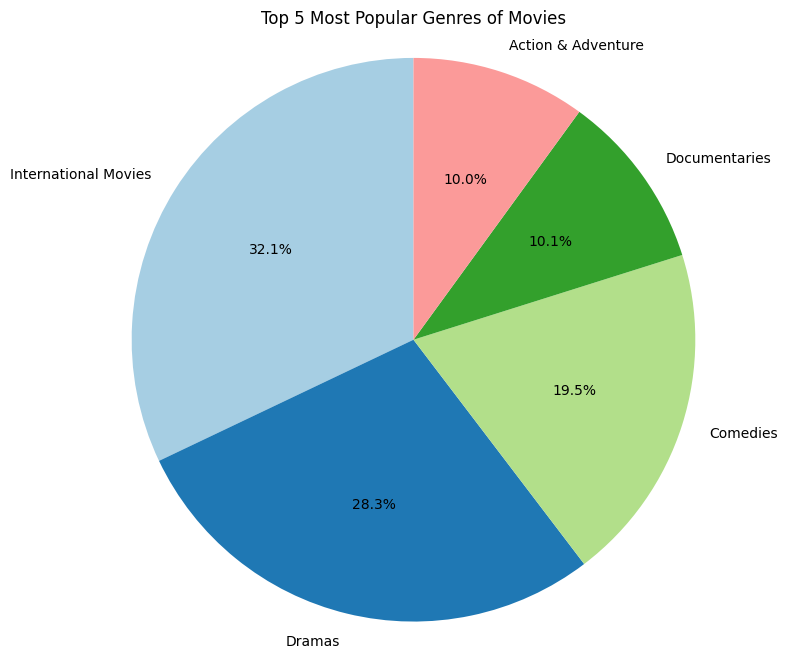

In [61]:
# 2 (15 marks). Create a pie chart which shows the 5 top most popular genres of the movies
  # in the dataset.

movies_df = netflix_df[netflix_df['type'] == 'Movie']

genres = movies_df['listed_in'].str.split(',').explode().str.strip()


top_genres = genres.value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Top 5 Most Popular Genres of Movies')
plt.axis('equal')

plt.show()



3. NUMPY (25 points)

In [62]:
# 1 (2 marks). Running the code in this cell throws an error. Why do we get this error
  # and how do we fix it?
  # - Answer - The code doesnt work because numpy has not been imported first we add this and it runs
import numpy as np
# use this numpy array for all exercises in this section
arr = np.array([0, 56, 82, 500, 140, 43, 92, 10, 25, 11, 18, 26, 150, 240, 364, 196])
arr

array([  0,  56,  82, 500, 140,  43,  92,  10,  25,  11,  18,  26, 150,
       240, 364, 196])

In [63]:
# 2 (5 marks). How many odd numbers do we have in the array?
odd_count = np.count_nonzero(arr % 2 != 0)

print(f"The number of odd numbers in the array is: {odd_count}")

The number of odd numbers in the array is: 3


In [64]:
# 3 (5 marks). Replace all odd numbers in arr with 999

arr[arr % 2 != 0] = 999

print("Array after replacing odd numbers with 999:")
print(arr)

Array after replacing odd numbers with 999:
[  0  56  82 500 140 999  92  10 999 999  18  26 150 240 364 196]


In [65]:
# 4 (8 marks). The above is a 1D array. Convert it into a 4D array and reverse its columns.

# Desired output
# > array([[500,  82,  56,   0],
# >        [ 10,  92, 999, 140],
# >        [ 26,  18, 999, 999],
# >        [196, 364, 240, 150]])
arr[arr % 2 != 0] = 999

arr_4d = arr.reshape((4, 4))

arr_4d_reversed = np.flip(arr_4d, axis=1)

print(arr_4d_reversed)


[[500  82  56   0]
 [ 10  92 999 140]
 [ 26  18 999 999]
 [196 364 240 150]]


In [66]:
# 5 (5 marks). Find all values which are higher than 100 and lower or equal than 500.

filtered_values = arr[(arr > 100) & (arr <= 500)]

print("Values between 100 and 500 (inclusive):")
print(filtered_values)

Values between 100 and 500 (inclusive):
[500 140 150 240 364 196]
